<a href="https://colab.research.google.com/github/sanganalasya-hash/Data-Science/blob/main/Copy_of_Unit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU6proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU6proj.ipynb"

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


# Context
I was looking for datasets that could be predicted by multiple linear regressions. I found a dataset for predicting sales and was curious to see which predictor or form of media best influenced sales.

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install bambi

In [ ]:
sew = pd.read_csv('https://raw.githubusercontent.com/sanganalasya-hash/Data-Science/refs/heads/main/advertising.csv')

In [ ]:
import bambi as bmb

In [ ]:
sew

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

# Data
The data looks pretty cool so far! Not too interesting but there is definetely some linear relationships between some of the  variables.TV especially has a strong trend.

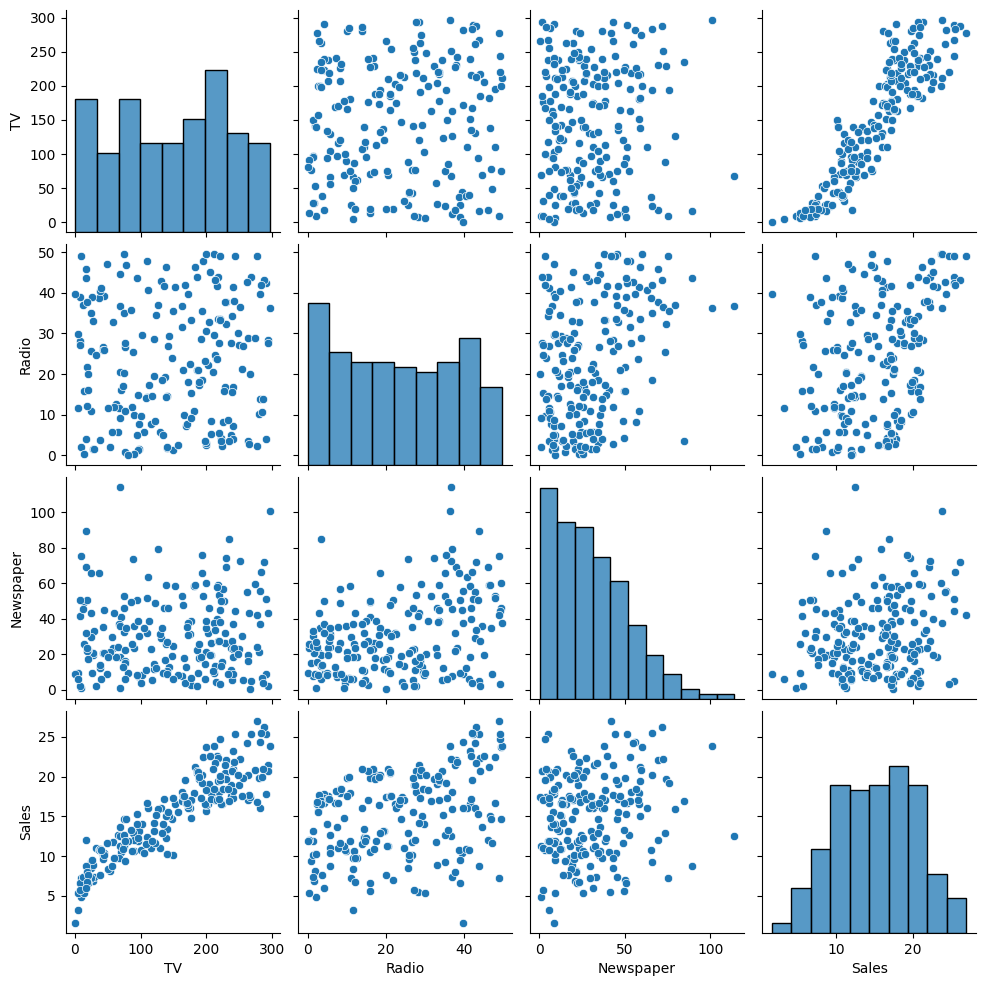

In [ ]:
sns.pairplot(sew)

# Predictors
My causal diagram shows that TV, Radio, and Newspaper all predict sales. I think that there might be some interrelations though, as if you have ads in one form of media, that might influence if you have ads in other form of media.

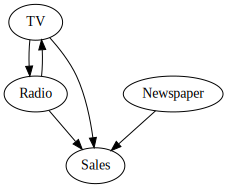

In [ ]:
dag_bballh = gv.Digraph(comment='bballh_dag') #bball hierarchy

dag_bballh.node('T', 'TV')
dag_bballh.node('G','Radio')
dag_bballh.node('P','Newspaper')
dag_bballh.node('L','Sales')

dag_bballh.edges(['TL','GL','PL', 'TG', 'GT'])

dag_bballh

# Models
I made four models with a combination of all of them in pairs and all three together. At the end, the model with TV and Radio and TV Radio, and Newspaper had similar elpd_loo which tells me that newspapers don't affect sales that much and TV and Radio ads are the main drivers of sails.

In [ ]:
#define the model
model_1 = bmb.Model("`Sales` ~ `Radio` + Newspaper", data=sew)
#fit the model
idata_1 = model_1.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model
model_2 = bmb.Model("`Sales` ~ `Radio` + TV", data=sew)
#fit the model
idata_2 = model_2.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model
model_3 = bmb.Model("`Sales` ~ `Newspaper` + TV", data=sew)
#fit the model
idata_3 = model_3.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model
model_4 = bmb.Model("`Sales` ~ `Newspaper` + `TV` + Radio", data=sew)
#fit the model
idata_4 = model_4.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
cmp_df = az.compare({
    'Radio + Newspaper': idata_1,
    'Radio + TV': idata_2,
    'Newspaper + TV': idata_3,
    'Radio + Newspaper + TV': idata_4
})

display(cmp_df)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Radio + TV,0,-388.082810,5.205453,0.000000,9.557397e-01,13.974066,0.000000,False,log
Radio + Newspaper + TV,1,-389.179800,6.225069,1.096990,3.498533e-11,13.956718,0.129974,False,log
Newspaper + TV,2,-446.846665,4.072867,58.763856,4.426033e-02,10.201749,12.454048,False,log
Radio + Newspaper,3,-607.301351,4.207789,219.218542,3.391760e-10,8.483762,12.677871,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

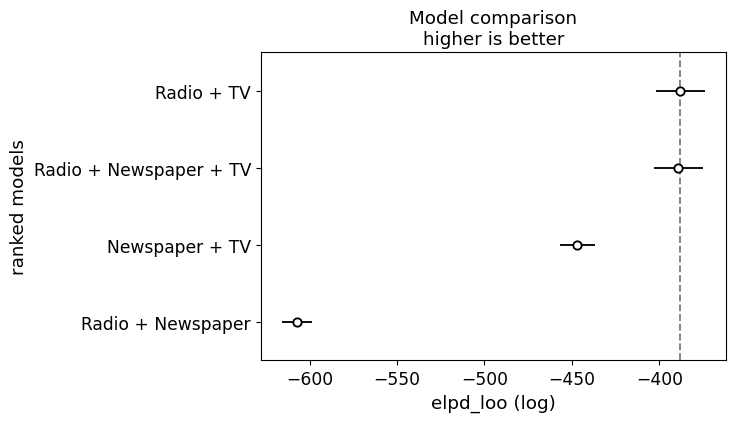

In [ ]:
az.plot_compare(cmp_df)

Removed Newspapers from my causal diagram as it has minimal or little effect.

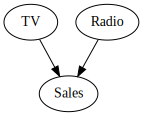

In [ ]:
dag_bballh = gv.Digraph(comment='bballh_dag') #bball hierarchy

dag_bballh.node('T', 'TV')
dag_bballh.node('G','Radio')
dag_bballh.node('L','Sales')

dag_bballh.edges(['TL','GL',])

dag_bballh

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='Radio', ylabel='Sales'>], dtype=object))

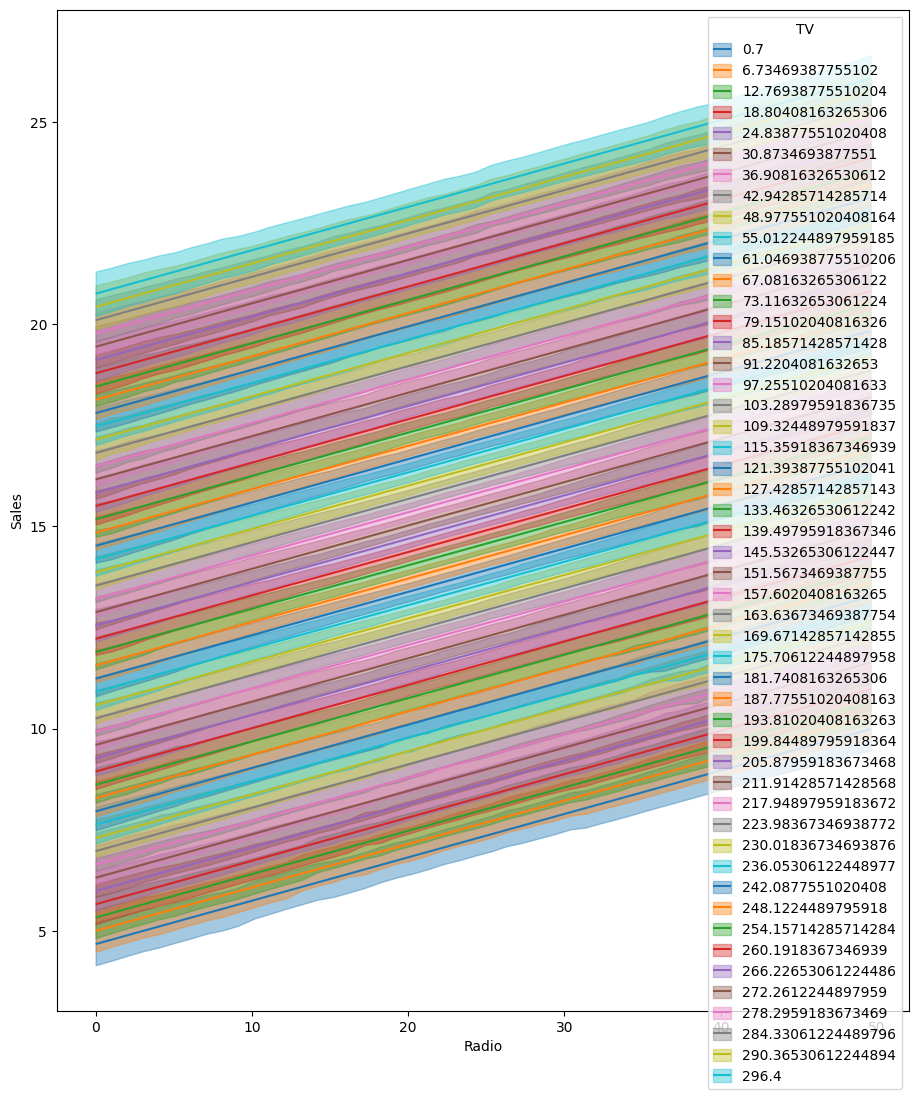

In [ ]:
bmb.interpret.plot_predictions(model_2,
                               idata_2,
                               ["Radio","TV"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

The model is very linear! As Radio goes up, sales go up, and as TV goes up so does radio and sales. They both predict sales pretty well and has a positive relationship.

# Conclusion
I think the model with the Radio and TV predicts it the best. I don't think newspaper has too much affect which makes sense because most people don't read the newspaper now days so it is likely only radio and TV has a super strong effect on sales. Overall, I would also want to see to what extent is TV the main predictor of sales versus Radio since the pair plot shows only a strong llinar relationship with TV and less so with radio.